# PYTHON VE VERİ BİLİMİNE GİRİŞ FİNAL ÖDEVİ
# ERDEMİR HİSSE VERİSETİ

Borsa verileri üzerinde yapılan veri bilimi , hisse senetleri, endeksler, ticaret hacmi gibi finansal verilerin analiz edilmesini kapsıyor. Bu analizler, gelecekteki fiyat hareketlerini tahmin etme, trendleri belirleme, risk yönetimi ve portföy optimizasyonu gibi alanlarda faydalı bilgiler elde etmek için yapılıyor.Öncelikle veri bilimi tekniklerini uygulayacağımız veri setimizi elde etmek için Türkiye İş Bankasının İş Yatırım sitesini kullandık. Burada bulunan Tarihsel Fiyat Bilgileri kısmından Erdemir şirketinin 2022-2023 yılları arasında hisse senedi fiyat bilgilerini filtreleyip veri setimizi oluşturduktan sonra indirdik.
Siteye ulaşım için :
https://www.isyatirim.com.tr/tr-tr/analiz/hisse/Sayfalar/Tarihsel-Fiyat-Bilgileri.aspx




In [402]:
!pip install skompiler
!pip install astor
!pip install xgboost
!pip install catboost
!pip install lightgbm
!pip install --upgrade matplotlib
!pip install yellowbrick
!pip install seaborn
!pip install matplotlib
!pip install matplotlib seaborn pandas
!pip install keras
!pip install tensorflow

Gerekli kütüphane ve araçları import ediyoruz.

In [403]:
import numpy as np
import pandas as pd 
import pylab
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as stats
from scipy.stats import shapiro
import statsmodels.stats.api as sms
from statsmodels.stats.descriptivestats import sign_test
import seaborn as sns
from sklearn.svm import SVR
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier


from sklearn.preprocessing import StandardScaler  
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from skompiler import skompile
from sklearn.metrics import r2_score



from warnings import filterwarnings
filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score


In [404]:
from matplotlib.pylab import rcParams
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense
from sklearn.preprocessing import MinMaxScaler

# Veri Seti Görünüş
Verisetini incelediğimizde  Tarih ,	Kapanış(TL),	Min(TL),	Max(TL),	AOF(TL),	Hacim(TL),	Sermaye(mn TL),	USDTRY,	BIST 100,	PiyasaDeğeri(mn TL),	PiyasaDeğeri(mn USD),	HalkaAçık PD(mn TL),	HalkaAçık PD(mn USD) sütünlarını görmekteyiz. Veri setimizde uygulamalar yapılacağı  zaman gereksiz sütünlar silinecektir.

In [405]:
df = pd.read_csv('erdemir.csv')
df.head()

,Tarih,Kapanış(TL),Min(TL),Max(TL),AOF(TL),Hacim(TL),Sermaye(mn TL),USDTRY,BIST 100,PiyasaDeğeri(mn TL),PiyasaDeğeri(mn USD),HalkaAçık PD(mn TL),HalkaAçık PD(mn USD)
0,03-01-2022,25.34,24.49,25.34,24.90,1351910568,3500,13.4463,1927,102340,7611,48693,3621
1,04-01-2022,26.19,25.45,26.33,25.93,2229221929,3500,13.2110,1964,105770,8006,50325,3809
2,05-01-2022,26.75,25.71,26.87,26.17,2597778492,3500,13.3928,2005,108010,8065,51391,3837
3,06-01-2022,26.18,26.18,26.85,26.53,2740072937,3500,13.6598,2008,105700,7738,50292,3682
4,07-01-2022,26.54,26.23,27.02,26.63,3771672520,3500,13.7774,2033,107170,7779,50991,3701


# Veriseti Hakkında Bilgi
Veriseti hakkında genel bilgiler aşağıda verilmiştir. Eksik değer olmadığı saptanmıştır.

In [406]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Tarih                 252 non-null    object 
 1   Kapanış(TL)           252 non-null    float64
 2   Min(TL)               252 non-null    float64
 3   Max(TL)               252 non-null    float64
 4   AOF(TL)               252 non-null    float64
 5   Hacim(TL)             252 non-null    int64  
 6   Sermaye(mn TL)        252 non-null    int64  
 7   USDTRY                252 non-null    float64
 8   BIST 100              252 non-null    int64  
 9   PiyasaDeğeri(mn TL)   252 non-null    int64  
 10  PiyasaDeğeri(mn USD)  252 non-null    int64  
 11  HalkaAçık PD(mn TL)   252 non-null    int64  
 12  HalkaAçık PD(mn USD)  252 non-null    int64  
dtypes: float64(5), int64(7), object(1)
memory usage: 25.7+ KB


In [407]:
print(df.isnull().sum())

Tarih                   0
Kapanış(TL)             0
Min(TL)                 0
Max(TL)                 0
AOF(TL)                 0
Hacim(TL)               0
Sermaye(mn TL)          0
USDTRY                  0
BIST 100                0
PiyasaDeğeri(mn TL)     0
PiyasaDeğeri(mn USD)    0
HalkaAçık PD(mn TL)     0
HalkaAçık PD(mn USD)    0
dtype: int64


In [408]:
df.shape 

(252, 13)

# Veri Bilimi Yöntemleri
# 1- Karar Ağaçları
Öncelikle veri setimizi geliştirme ortamına import ediyoruz

In [409]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
df= pd.read_csv('erdemir.csv')
df.head()

,Tarih,Kapanış(TL),Min(TL),Max(TL),AOF(TL),Hacim(TL),Sermaye(mn TL),USDTRY,BIST 100,PiyasaDeğeri(mn TL),PiyasaDeğeri(mn USD),HalkaAçık PD(mn TL),HalkaAçık PD(mn USD)
0,03-01-2022,25.34,24.49,25.34,24.90,1351910568,3500,13.4463,1927,102340,7611,48693,3621
1,04-01-2022,26.19,25.45,26.33,25.93,2229221929,3500,13.2110,1964,105770,8006,50325,3809
2,05-01-2022,26.75,25.71,26.87,26.17,2597778492,3500,13.3928,2005,108010,8065,51391,3837
3,06-01-2022,26.18,26.18,26.85,26.53,2740072937,3500,13.6598,2008,105700,7738,50292,3682
4,07-01-2022,26.54,26.23,27.02,26.63,3771672520,3500,13.7774,2033,107170,7779,50991,3701


Ardından işleme sokmayacağımız gereksiz sutunları kaldırıyoruz.


In [410]:
df = df.drop(df.columns[[0,5,6,7,8,9,10,11,12]],axis=1)
df.head()

,Kapanış(TL),Min(TL),Max(TL),AOF(TL)
0,25.34,24.49,25.34,24.90
1,26.19,25.45,26.33,25.93
2,26.75,25.71,26.87,26.17
3,26.18,26.18,26.85,26.53
4,26.54,26.23,27.02,26.63


Veri setimizin kod yazarken kolaylık olması açısından isimlendirmelerini değiştirdik.

In [411]:
df.rename(columns={"Kapanış(TL)": "Close"}, inplace=True)
df.rename(columns={"AOF(TL)": "Open"}, inplace=True) 
df.rename(columns={"Min(TL)": "Min"}, inplace=True) 
df.rename(columns={"Max(TL)": "Max"}, inplace=True)
df.head()

,Close,Min,Max,Open
0,25.34,24.49,25.34,24.90
1,26.19,25.45,26.33,25.93
2,26.75,25.71,26.87,26.17
3,26.18,26.18,26.85,26.53
4,26.54,26.23,27.02,26.63


Veri setinde hissenin günlük trendini belirlemek için aşağıdaki işlemi yaptık

In [412]:
durum = []
for index, row in df.iterrows(): 
    if row['Close'] > row['Open']:
        durum.append(1)
    else:
        durum.append(0)
df['Durum'] = durum
df.head() 


,Close,Min,Max,Open,Durum
0,25.34,24.49,25.34,24.90,1
1,26.19,25.45,26.33,25.93,1
2,26.75,25.71,26.87,26.17,1
3,26.18,26.18,26.85,26.53,0
4,26.54,26.23,27.02,26.63,0


Veri setimizi test ve eğitim verisi olarak 2 ye ayırdık

In [413]:
from sklearn.model_selection import train_test_split

veri= df.copy()
y =veri["Durum"]
X = veri.drop(columns="Durum",axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=42)

Veri setinin optimizasyon işlemlerini yaptık

In [414]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Veri setinde karar ağacı algoritmasını çalıştırmak için sklearn kütüphanesindeki DecisionTreeClassifier’ı kullandık.

In [415]:
from sklearn.tree import DecisionTreeClassifier, plot_tree 
model= DecisionTreeClassifier()
model.fit(X_train,y_train)
prediction = model.predict(X_test)

Veri setimizde accuracy, precision, recoll değerlerini ölçtük.

In [416]:
from sklearn.metrics import accuracy_score, precision_score, recall_score 
accuracy = accuracy_score(y_test, prediction)
precision = precision_score(y_test, prediction)  
recall = recall_score(y_test, prediction)
print("Accuracy:", accuracy)
print("Precision:", precision) 
print("Recall:", recall)

Accuracy: 0.7450980392156863
Precision: 0.875
Recall: 0.56


Veri setimizin son durumunu görselleştirmek için python kütüphanesi olan matplotlib.pyplot kullandık.

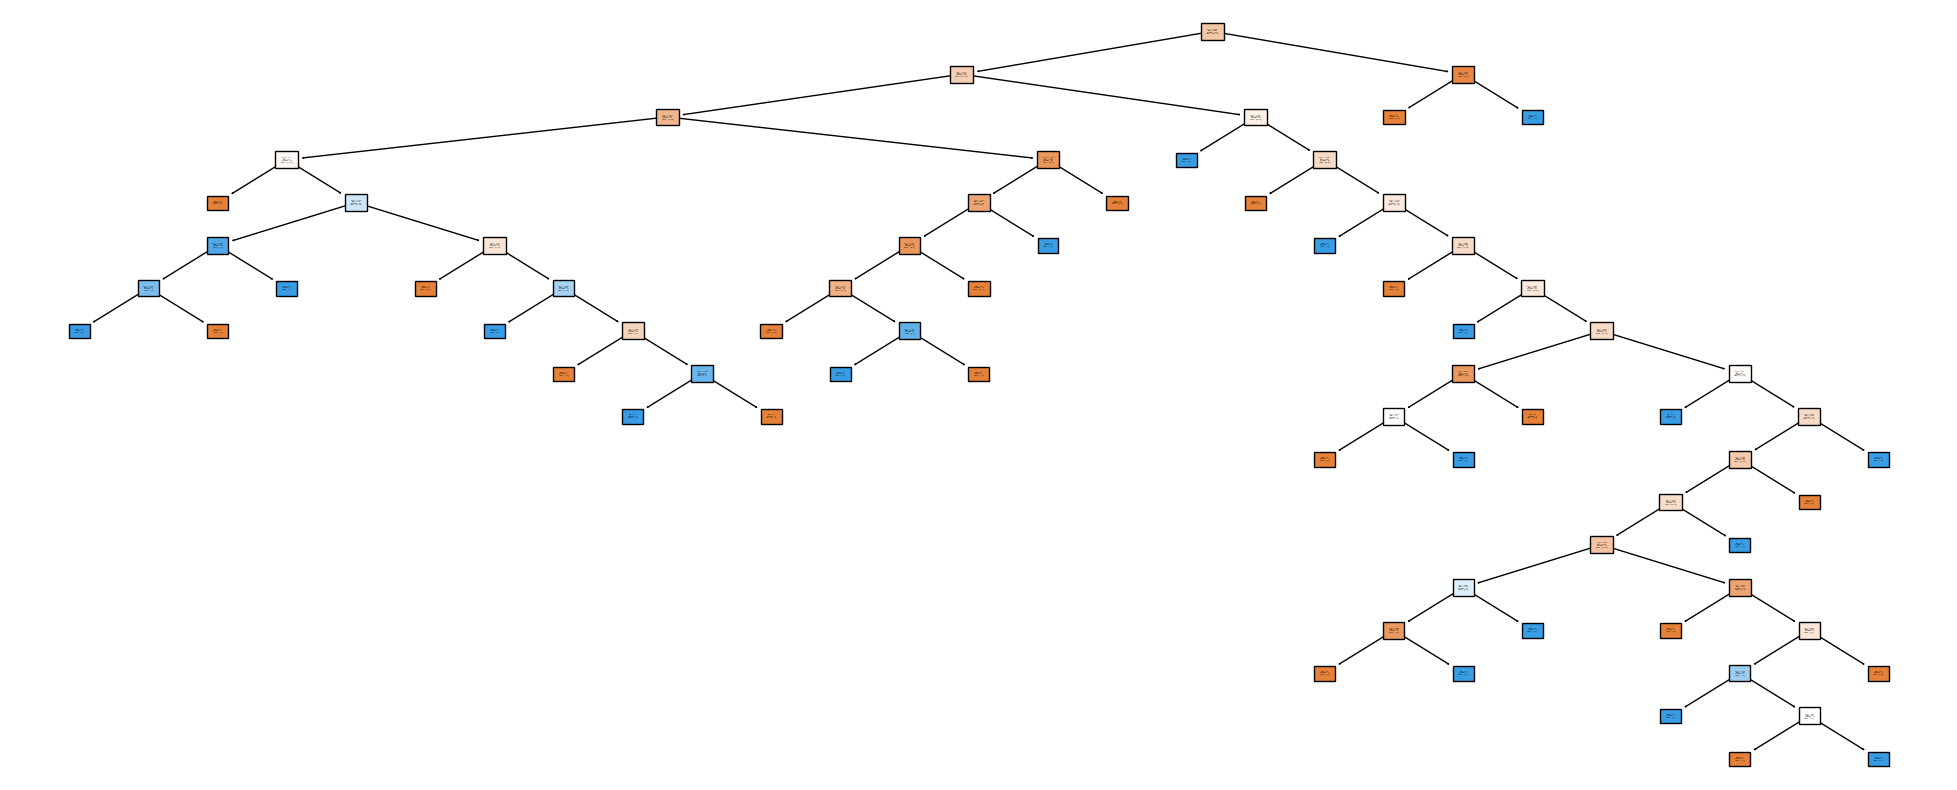

In [417]:
import matplotlib.pyplot as plt 
plot_tree(model,filled= True, fontsize=1)
plt.show()

Ölçülen değerlerin sınıflandırmasında ilgili parametreyi default olarak bıraktığımız için gini algoritması çalıştı.

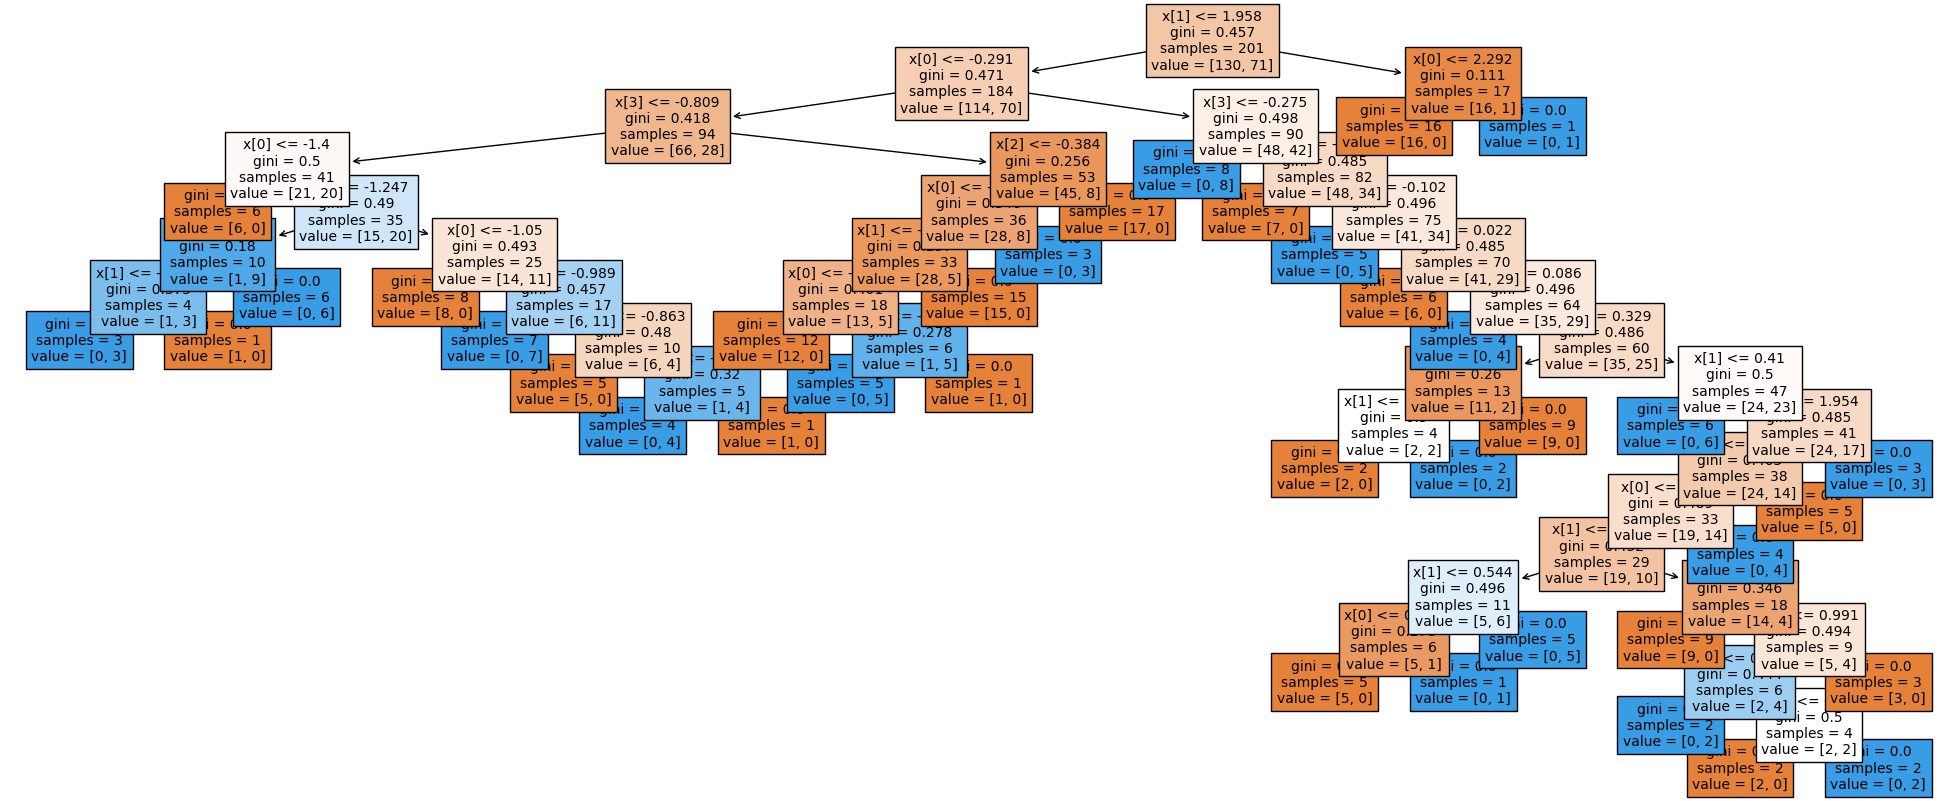

In [418]:
import matplotlib.pyplot as plt 
plot_tree(model, filled =True, fontsize=10)
plt.show()

Karar ağacında dallanma sayısı : Karar ağacı algoritmasını çalıştırdığımızda fazla dallanma, daha karmaşık ve derin bir ağaç yapısına yol açtı. Dallanmanın fazla olması daha spesifik sonuçlara ulaşmamızı sağlarken aynı zamanda eğitim verisine aşırı uyum sağlamasından ötürü genelleme yapma yeteneğini kötü etkiledi.

#	K-NN ALGORİTMASI RAPOR
Öncelikle veri setimizi geliştirme ortamımıza import ediyoruz.

In [419]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
df= pd.read_csv('erdemir.csv')
df.head()

,Tarih,Kapanış(TL),Min(TL),Max(TL),AOF(TL),Hacim(TL),Sermaye(mn TL),USDTRY,BIST 100,PiyasaDeğeri(mn TL),PiyasaDeğeri(mn USD),HalkaAçık PD(mn TL),HalkaAçık PD(mn USD)
0,03-01-2022,25.34,24.49,25.34,24.90,1351910568,3500,13.4463,1927,102340,7611,48693,3621
1,04-01-2022,26.19,25.45,26.33,25.93,2229221929,3500,13.2110,1964,105770,8006,50325,3809
2,05-01-2022,26.75,25.71,26.87,26.17,2597778492,3500,13.3928,2005,108010,8065,51391,3837
3,06-01-2022,26.18,26.18,26.85,26.53,2740072937,3500,13.6598,2008,105700,7738,50292,3682
4,07-01-2022,26.54,26.23,27.02,26.63,3771672520,3500,13.7774,2033,107170,7779,50991,3701


 Ardından işleme sokmayacağımız gereksiz sütunları kaldırıyoruz.

In [420]:
df = df.drop(df.columns[[0,5,6,7,8,9,10,11,12]],axis=1)
df.head()

,Kapanış(TL),Min(TL),Max(TL),AOF(TL)
0,25.34,24.49,25.34,24.90
1,26.19,25.45,26.33,25.93
2,26.75,25.71,26.87,26.17
3,26.18,26.18,26.85,26.53
4,26.54,26.23,27.02,26.63


Veri setimizin kod yazarken kolaylık olması açısından isimlendirmelerini değiştirdik.

In [421]:
df.rename(columns={"Kapanış(TL)": "Close"}, inplace=True)
df.rename(columns={"AOF(TL)": "Open"}, inplace=True) 
df.rename(columns={"Min(TL)": "Min"}, inplace=True) 
df.rename(columns={"Max(TL)": "Max"}, inplace=True)
df.head()

,Close,Min,Max,Open
0,25.34,24.49,25.34,24.90
1,26.19,25.45,26.33,25.93
2,26.75,25.71,26.87,26.17
3,26.18,26.18,26.85,26.53
4,26.54,26.23,27.02,26.63


Veri setinde hissenin günlük trendini belirlemek için aşağıdaki işlemi yaptık.

In [422]:
durum = []
for index, row in df.iterrows(): 
    if row['Close'] > row['Open']:
        durum.append(1)
    else:
        durum.append(0)
df['Durum'] = durum
df.head() 


,Close,Min,Max,Open,Durum
0,25.34,24.49,25.34,24.90,1
1,26.19,25.45,26.33,25.93,1
2,26.75,25.71,26.87,26.17,1
3,26.18,26.18,26.85,26.53,0
4,26.54,26.23,27.02,26.63,0


Veri setimizi test ve eğitim verisi olarak 2 ye ayırdık.

In [423]:
from sklearn.model_selection import train_test_split

veri= df.copy()
y =veri["Durum"]
X = veri.drop(columns="Durum",axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=42)

Veri setinin optimizasyon işlemlerini yaptık

In [424]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Veri setinde Knn algoritmasını çalıştırmak için sklearn kütüphanesindeki KNeighborsClassifier’ı kullandık.

In [425]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train,y_train)
prediction = model.predict(X_test)

Veri setimizde accuracy, precision, recoll değerlerini ölçtük.

In [426]:
from sklearn.metrics import accuracy_score, precision_score, recall_score 
accuracy = accuracy_score(y_test, prediction)
precision = precision_score(y_test, prediction)  
recall = recall_score(y_test, prediction)
print("Accuracy:", accuracy)
print("Precision:", precision) 
print("Recall:", recall)

Accuracy: 0.6862745098039216
Precision: 0.8
Recall: 0.48


Veri setimizde K-nn algoritması çalışırken kaç adet en yakın komşuya bakacağını bildiren k değişkeni ile ilgili en iyi sonucu yakalamak için aşağıdaki kodu çalıştırdık.

In [427]:
import matplotlib.pyplot as plt
basarı = []
for k in range(1,20):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)  
    prediction2 = knn.predict(X_test)
    basarı.append(accuracy_score(y_test, prediction2))

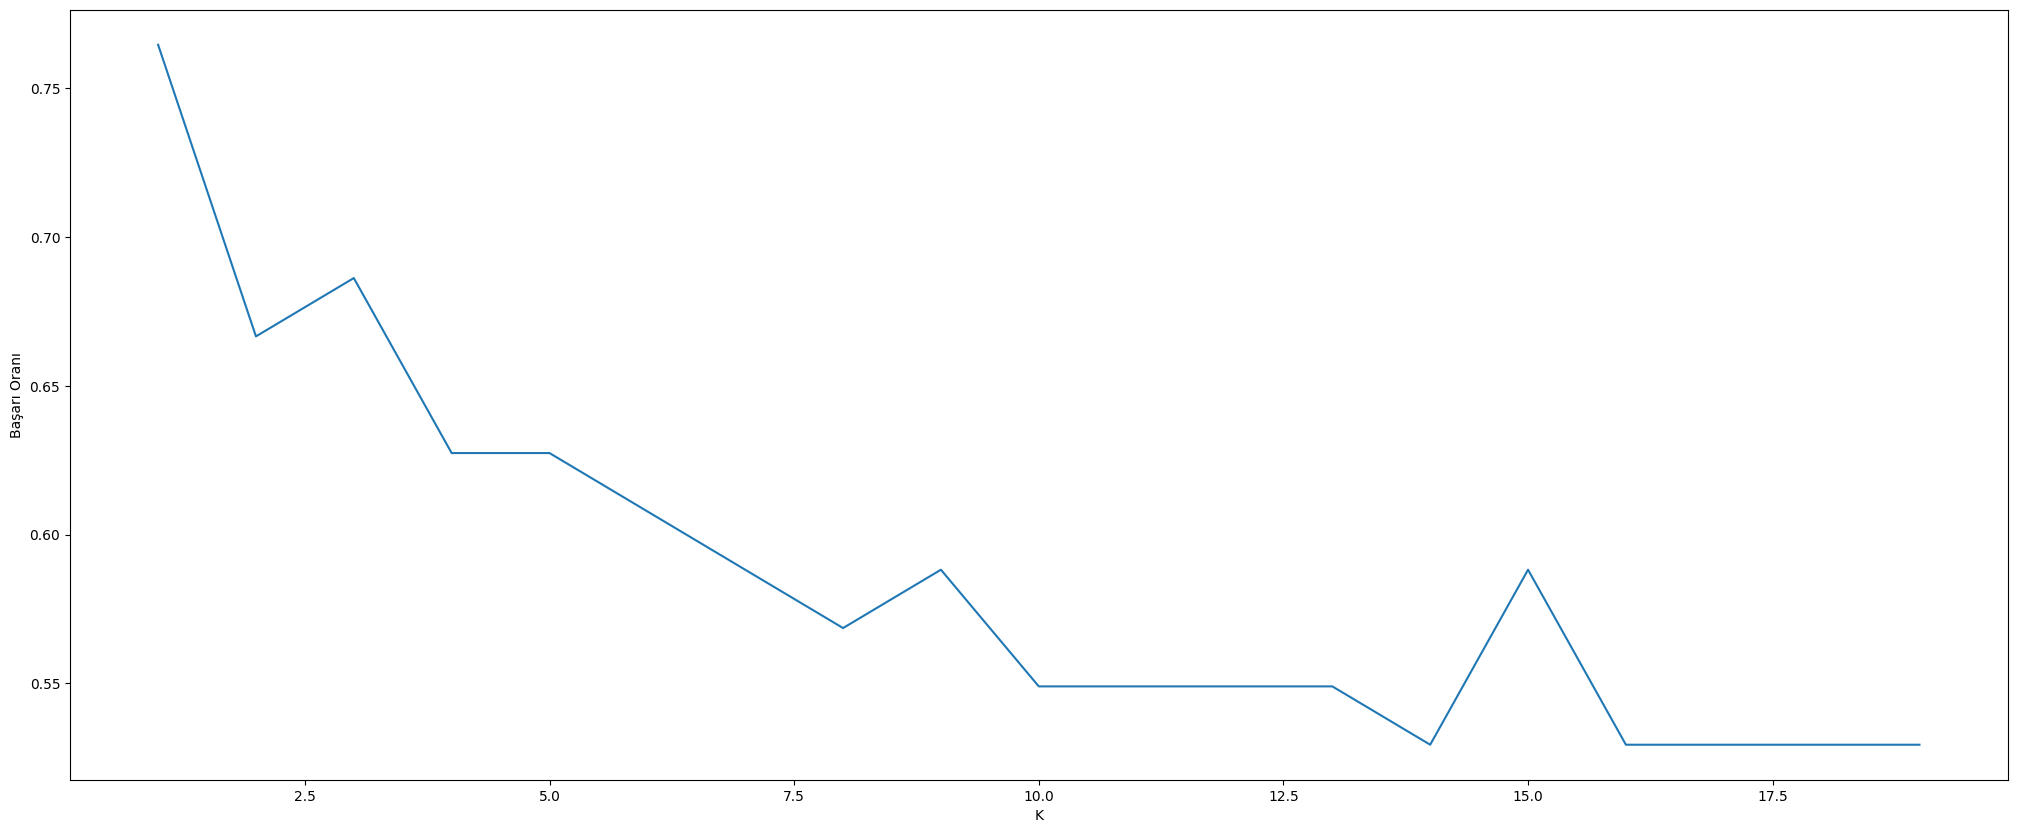

In [428]:
plt.plot(range(1,20),basarı)
plt.xlabel("K")
plt.ylabel("Başarı Oranı")
plt.show()

# NAİVE-BAYES ALGORİTMASI RAPOR
Öncelikle veri setimizi geliştirme ortamımıza import ediyoruz.

In [429]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv('Erdemir.csv')
df.head()

,Tarih,Kapanış(TL),Min(TL),Max(TL),AOF(TL),Hacim(TL),Sermaye(mn TL),USDTRY,BIST 100,PiyasaDeğeri(mn TL),PiyasaDeğeri(mn USD),HalkaAçık PD(mn TL),HalkaAçık PD(mn USD)
0,03-01-2022,25.34,24.49,25.34,24.90,1351910568,3500,13.4463,1927,102340,7611,48693,3621
1,04-01-2022,26.19,25.45,26.33,25.93,2229221929,3500,13.2110,1964,105770,8006,50325,3809
2,05-01-2022,26.75,25.71,26.87,26.17,2597778492,3500,13.3928,2005,108010,8065,51391,3837
3,06-01-2022,26.18,26.18,26.85,26.53,2740072937,3500,13.6598,2008,105700,7738,50292,3682
4,07-01-2022,26.54,26.23,27.02,26.63,3771672520,3500,13.7774,2033,107170,7779,50991,3701


 Ardından işleme sokmayacağımız gereksiz sütunları kaldırıyoruz.

Veri setimizin kod yazarken kolaylık olması açısından isimlendirmelerini değiştirdik.

In [430]:
df.rename(columns={"Kapanış(TL)": "Close"}, inplace=True)
df.rename(columns={"AOF(TL)": "Open"}, inplace=True)
df.rename(columns={"Min(TL)": "Min"}, inplace=True)
df.rename(columns={"Max(TL)": "Max"}, inplace=True)
df.head()

,Tarih,Close,Min,Max,Open,Hacim(TL),Sermaye(mn TL),USDTRY,BIST 100,PiyasaDeğeri(mn TL),PiyasaDeğeri(mn USD),HalkaAçık PD(mn TL),HalkaAçık PD(mn USD)
0,03-01-2022,25.34,24.49,25.34,24.90,1351910568,3500,13.4463,1927,102340,7611,48693,3621
1,04-01-2022,26.19,25.45,26.33,25.93,2229221929,3500,13.2110,1964,105770,8006,50325,3809
2,05-01-2022,26.75,25.71,26.87,26.17,2597778492,3500,13.3928,2005,108010,8065,51391,3837
3,06-01-2022,26.18,26.18,26.85,26.53,2740072937,3500,13.6598,2008,105700,7738,50292,3682
4,07-01-2022,26.54,26.23,27.02,26.63,3771672520,3500,13.7774,2033,107170,7779,50991,3701


In [431]:
durum = []
for index, row in df.iterrows():
    if row['Close'] > row['Open']:
        durum.append(1)
    else:
        durum.append(0)
df['Durum'] = durum
df.head()

,Tarih,Close,Min,Max,Open,Hacim(TL),Sermaye(mn TL),USDTRY,BIST 100,PiyasaDeğeri(mn TL),PiyasaDeğeri(mn USD),HalkaAçık PD(mn TL),HalkaAçık PD(mn USD),Durum
0,03-01-2022,25.34,24.49,25.34,24.90,1351910568,3500,13.4463,1927,102340,7611,48693,3621,1
1,04-01-2022,26.19,25.45,26.33,25.93,2229221929,3500,13.2110,1964,105770,8006,50325,3809,1
2,05-01-2022,26.75,25.71,26.87,26.17,2597778492,3500,13.3928,2005,108010,8065,51391,3837,1
3,06-01-2022,26.18,26.18,26.85,26.53,2740072937,3500,13.6598,2008,105700,7738,50292,3682,0
4,07-01-2022,26.54,26.23,27.02,26.63,3771672520,3500,13.7774,2033,107170,7779,50991,3701,0


Veri setinde eğitim ve test datasını ayırdık.

In [432]:
X = df.iloc[:, [1,2,3]].values
y = df.iloc[:, 12].values

Veri setinde eğitim ve test datasını atadık.

In [433]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

Veri optimizasyonu için standard scaler kullandık.

In [434]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

Veri setimizde naive bayes algoritmasını kullanabilmek için GaussianNB metodunu kullandık bu metoda python sklearn.naive_bayes kütüphanesinden eriştik.

In [435]:
nbg = GaussianNB()
nbg.fit(X_train, y_train)
tahmin = nbg.predict(X_test)

Veri setimizde accuracy, precision, recoll değerlerini ölçtük.

In [436]:
accuracy = accuracy_score(y_test, tahmin)
precision = precision_score(y_test, tahmin, average='macro')
recall = recall_score(y_test, tahmin, average='macro')

print("Doğruluk (Accuracy):", accuracy)
print("Kesinlik (Precision):", precision)
print("Duyarlılık (Recall):", recall)


Doğruluk (Accuracy): 0.013157894736842105
Kesinlik (Precision): 0.012195121951219513
Duyarlılık (Recall): 0.012195121951219513


Naive bayes algoritması için gaussian yönteminde metodun default halini kullandık.

# DESTEK VEKTÖR MAKİNELERİ ALGORİTMASI RAPOR
Öncelikle veri setimizi geliştirme ortamımıza import ediyoruz

In [437]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv('Erdemir.csv')
df.head()

,Tarih,Kapanış(TL),Min(TL),Max(TL),AOF(TL),Hacim(TL),Sermaye(mn TL),USDTRY,BIST 100,PiyasaDeğeri(mn TL),PiyasaDeğeri(mn USD),HalkaAçık PD(mn TL),HalkaAçık PD(mn USD)
0,03-01-2022,25.34,24.49,25.34,24.90,1351910568,3500,13.4463,1927,102340,7611,48693,3621
1,04-01-2022,26.19,25.45,26.33,25.93,2229221929,3500,13.2110,1964,105770,8006,50325,3809
2,05-01-2022,26.75,25.71,26.87,26.17,2597778492,3500,13.3928,2005,108010,8065,51391,3837
3,06-01-2022,26.18,26.18,26.85,26.53,2740072937,3500,13.6598,2008,105700,7738,50292,3682
4,07-01-2022,26.54,26.23,27.02,26.63,3771672520,3500,13.7774,2033,107170,7779,50991,3701


Ardından işleme sokmayacağımız gereksiz sütunları kaldırıyoruz.

In [438]:
df = df.drop(df.columns[[0,5,6,7,8,9,10,11,12]],axis=1)
df.head()

,Kapanış(TL),Min(TL),Max(TL),AOF(TL)
0,25.34,24.49,25.34,24.90
1,26.19,25.45,26.33,25.93
2,26.75,25.71,26.87,26.17
3,26.18,26.18,26.85,26.53
4,26.54,26.23,27.02,26.63


Veri setimizin kod yazarken kolaylık olması açısından isimlendirmelerini değiştirdik.

In [439]:
df.rename(columns={"Kapanış(TL)": "Close"}, inplace=True)
df.rename(columns={"AOF(TL)": "Open"}, inplace=True) 
df.rename(columns={"Min(TL)": "Min"}, inplace=True) 
df.rename(columns={"Max(TL)": "Max"}, inplace=True)
df.head()

,Close,Min,Max,Open
0,25.34,24.49,25.34,24.90
1,26.19,25.45,26.33,25.93
2,26.75,25.71,26.87,26.17
3,26.18,26.18,26.85,26.53
4,26.54,26.23,27.02,26.63


Veri setinde hissenin günlük trendini belirlemek için aşağıdaki işlemi yaptık.

In [440]:
durum = []
for index, row in df.iterrows(): 
    if row['Close'] > row['Open']:
        durum.append(1)
    else:
        durum.append(0)
df['Durum'] = durum
df.head() 

,Close,Min,Max,Open,Durum
0,25.34,24.49,25.34,24.90,1
1,26.19,25.45,26.33,25.93,1
2,26.75,25.71,26.87,26.17,1
3,26.18,26.18,26.85,26.53,0
4,26.54,26.23,27.02,26.63,0


Veri setimizi test ve eğitim verisi olarak 2 ye ayırdık.

In [441]:
from sklearn.model_selection import train_test_split, GridSearchCV

veri= df.copy()
y =veri["Durum"]
X = veri.iloc[:,[0,1,2]].values
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=42)

Veri setinin optimizasyon işlemlerini yaptık
 


In [442]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Veri setinde SVC algoritmasını çalıştırmak için sklearn kütüphanesindeki SVC’i kullandık.

In [443]:
from sklearn.svm import SVC
svm = SVC(random_state= 0, C = 18, kernel ="linear")
svm.fit(X_train,y_train)
prediction = svm.predict(X_test)

Veri setimizde accuracy, precision, recoll değerlerini ölçtük.

In [444]:
accuracy = accuracy_score(y_test, prediction)
precision = precision_score(y_test, prediction)  
recall = recall_score(y_test, prediction)
print("Accuracy:", accuracy)
print("Precision:", precision) 
print("Recall:", recall)

Accuracy: 0.8823529411764706
Precision: 0.9523809523809523
Recall: 0.8


Veri setine Svc algoritmasını uygularken kullandığımız SVC() metodunun alabileceği C,  kernel gibi değişkenler var. Bu değişkenler içerisinde elimizdeki veriye en optimal sonucu verecek parametre değerlerini bulabilmek için aşağıdaki kodu çalıştırdık.

In [445]:
paramethers = {"C":range(1,20),"kernel":["linear","poly","rbf"]}
grid = GridSearchCV(estimator = svm, param_grid= paramethers, cv =10, n_jobs = -1)
grid.fit(X_train,y_train)
print(grid.best_params_)

{'C': 16, 'kernel': 'linear'}


Veri görselleştirmek için aşağıdaki kodu kullandık. Kodda SVC metoduna parametre olarak verdiğimiz k değerini ölçtük tabloda görüldüğü gibi K değeri 13 seviyelerine kadar dalgalı bir şekilde ilerlerken 13 den sonra 0.85 üzeri doğruluk seviyelerine ulaşıyor

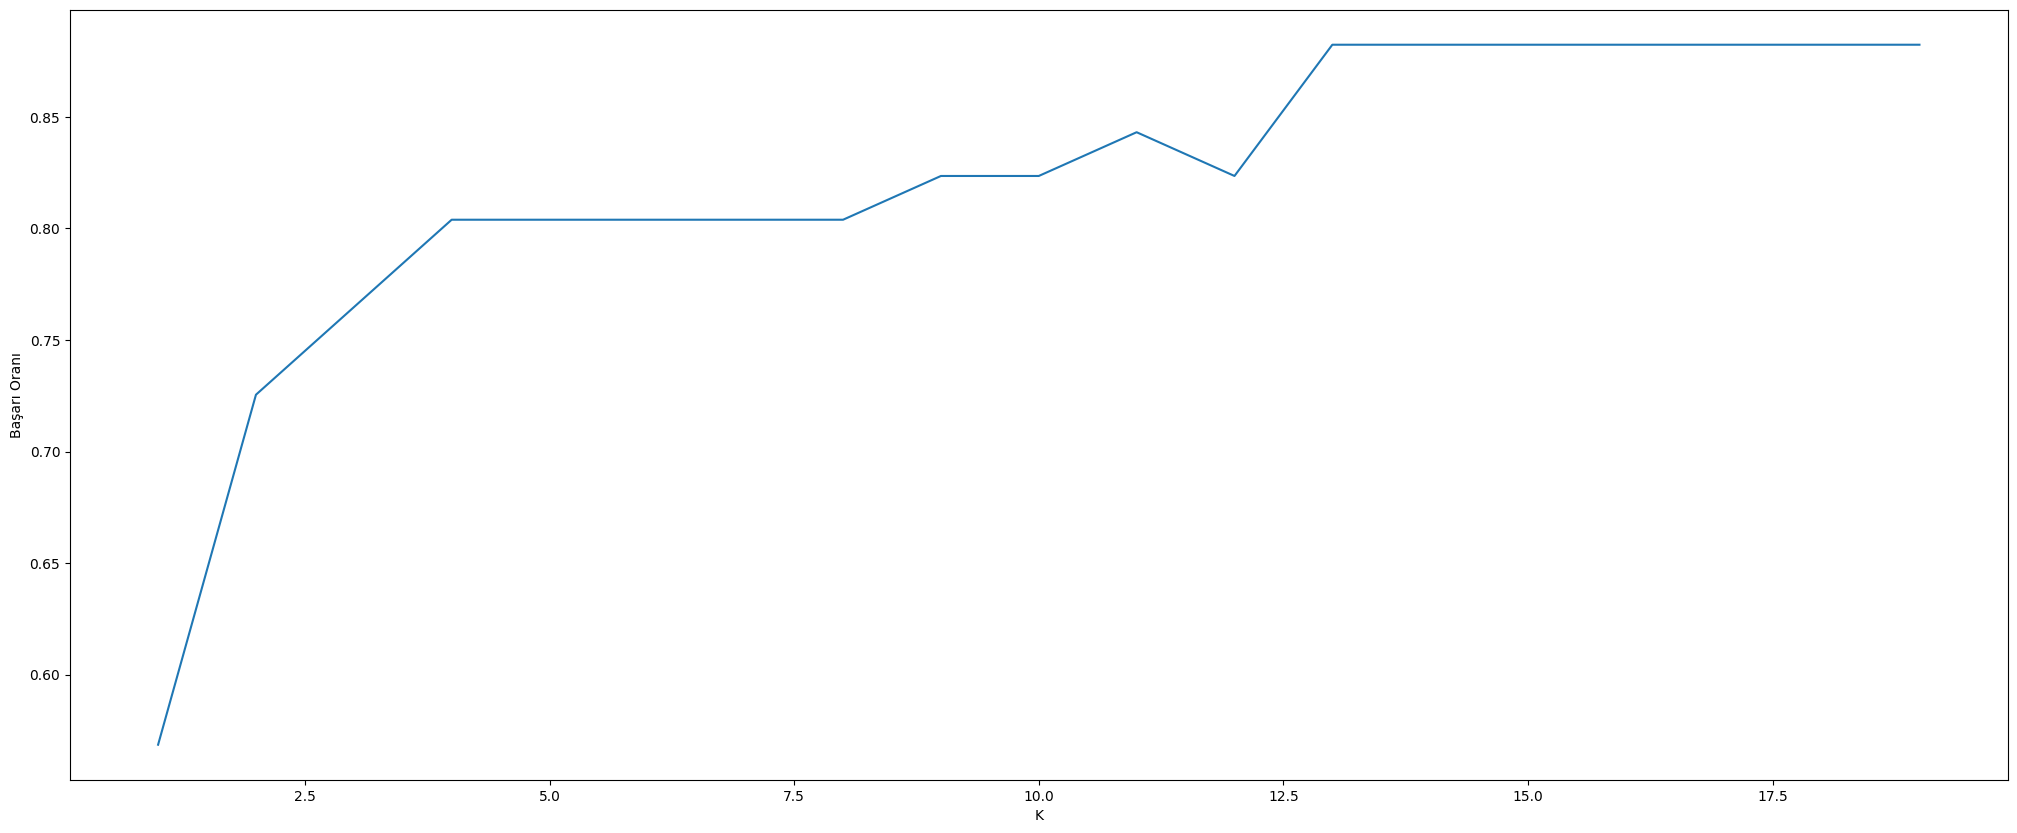

In [446]:
basarı = []
for k in range(1,20):
    svm = SVC(random_state = 0, C=k, kernel = "linear")
    svm.fit(X_train,y_train)
    prediction2 = svm.predict(X_test) 
    basarı.append(accuracy_score(y_test, prediction2))

plt.plot(range(1,20), basarı)
plt.xlabel("K")
plt.ylabel("Başarı Oranı")
plt.show()

Elde ettiğimiz sınıflandırma verisini görselleştirmek için aşağıdaki kodu kullandık

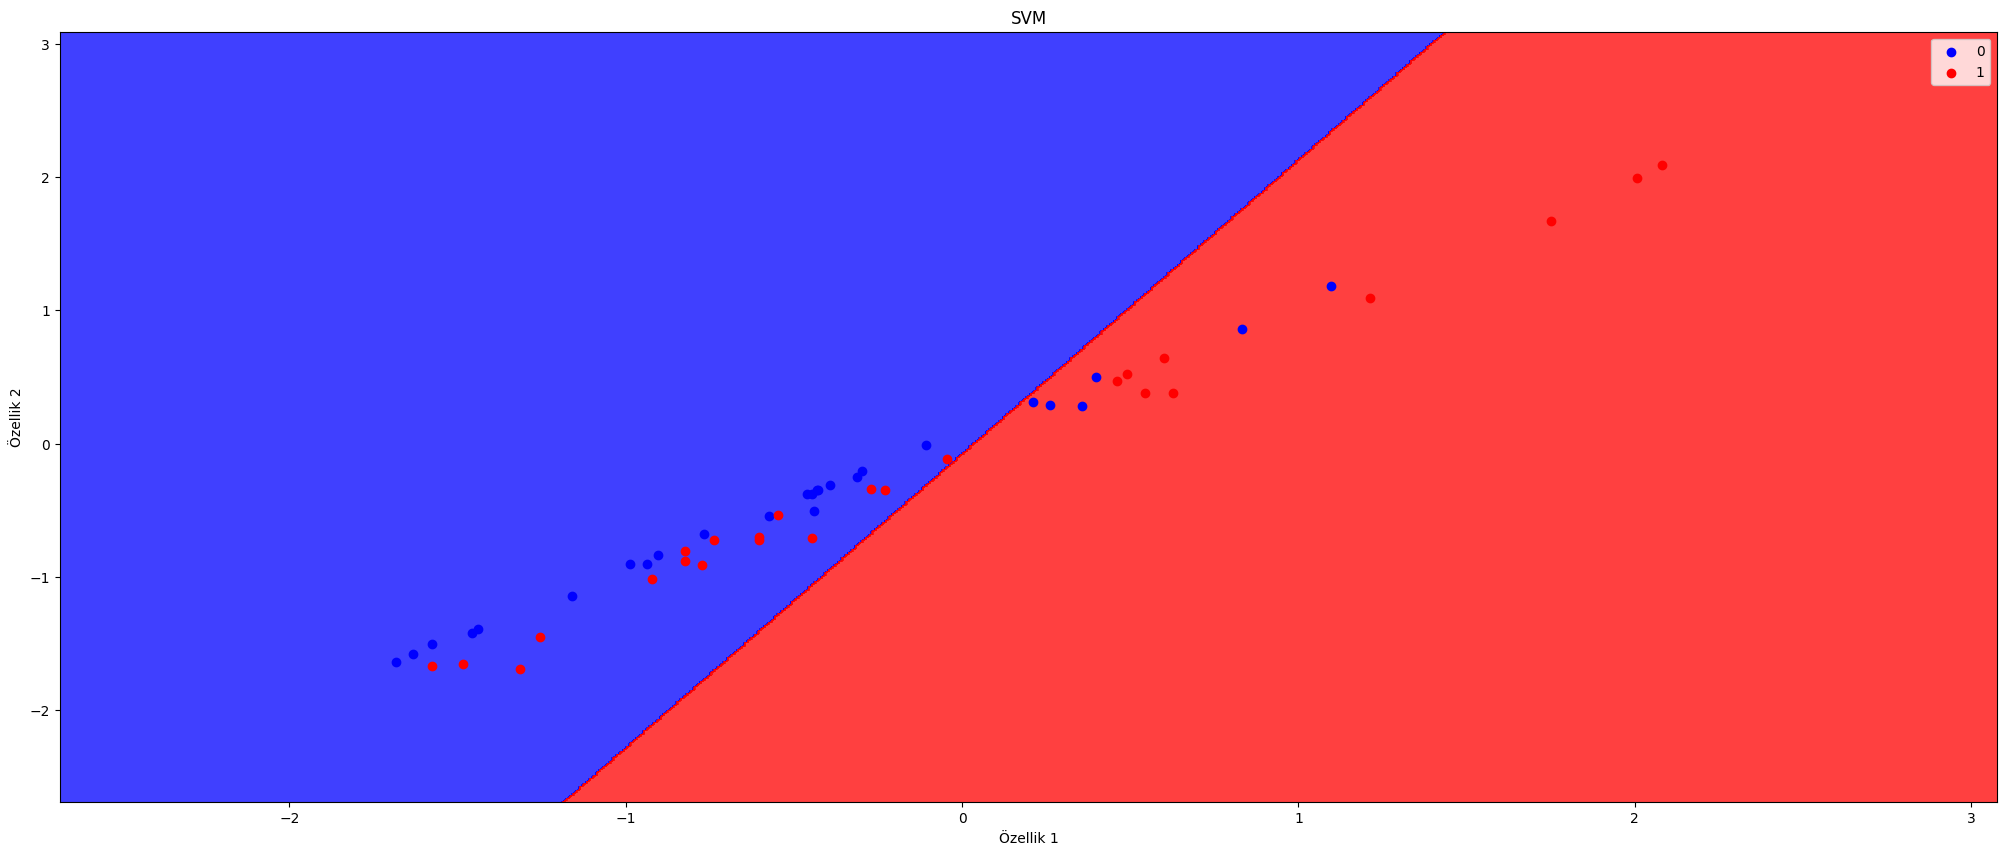

In [447]:
# X_test'in üç özellikli olduğunu varsayarak
X_set, y_set = X_test[:, [0, 1]], y_test

# Grid oluşturma
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))

# Sadece ilk iki özelliği kullanarak tahmin yapma
plt.contourf(X1, X2, svm.predict(np.array([X1.ravel(), X2.ravel(), np.zeros_like(X1.ravel())]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('blue', 'red')))

# Eksenleri sınırlama
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

# Veri noktalarını çizme
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('blue', 'red'))(i), label = j)

# Grafiği etiketleme
plt.title('SVM')
plt.xlabel('Özellik 1')
plt.ylabel('Özellik 2')
plt.legend()
plt.show()


# YAPAY SİNİR AĞLARI LTSM ALGORİTMASI RAPOR

In [448]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=25,10
from keras.models import Sequential
from keras.layers import LSTM,Dropout,Dense
from sklearn.preprocessing import MinMaxScaler

In [449]:
import pandas as pd 
df = pd.read_csv('erdemir.csv')
df.head()

,Tarih,Kapanış(TL),Min(TL),Max(TL),AOF(TL),Hacim(TL),Sermaye(mn TL),USDTRY,BIST 100,PiyasaDeğeri(mn TL),PiyasaDeğeri(mn USD),HalkaAçık PD(mn TL),HalkaAçık PD(mn USD)
0,03-01-2022,25.34,24.49,25.34,24.90,1351910568,3500,13.4463,1927,102340,7611,48693,3621
1,04-01-2022,26.19,25.45,26.33,25.93,2229221929,3500,13.2110,1964,105770,8006,50325,3809
2,05-01-2022,26.75,25.71,26.87,26.17,2597778492,3500,13.3928,2005,108010,8065,51391,3837
3,06-01-2022,26.18,26.18,26.85,26.53,2740072937,3500,13.6598,2008,105700,7738,50292,3682
4,07-01-2022,26.54,26.23,27.02,26.63,3771672520,3500,13.7774,2033,107170,7779,50991,3701


Ardından işleme sokmayacağımız gereksiz sütunları kaldırıyoruz.

In [450]:
df = df.drop(df.columns[[2, 3, 4, 5, 6, 7, 8, 9, 10 , 11, 12]], axis=1)
df.head()

,Tarih,Kapanış(TL)
0,03-01-2022,25.34
1,04-01-2022,26.19
2,05-01-2022,26.75
3,06-01-2022,26.18
4,07-01-2022,26.54


Veri setinde kod yazarken türkçe ifade kullanmamak için gerekli sütun isimlendirmelerini yapıyoruz.

In [451]:
df.rename(columns={"Tarih": "Date"}, inplace=True)
df.rename(columns={"Kapanış(TL)": "Close"}, inplace=True)
df = df[['Date', 'Close']]
df.head()


,Date,Close
0,03-01-2022,25.34
1,04-01-2022,26.19
2,05-01-2022,26.75
3,06-01-2022,26.18
4,07-01-2022,26.54


Veri setinde tarih formatını kod yazmaya uygun hale getirdik ve kapanış değerlerindeki karakterleri kaldırdık.

In [452]:
df.dtypes

Date      object
Close    float64
dtype: object

In [453]:
df = df.replace({'\$':''}, regex = True)

In [454]:
df = df.astype({"Close": float})
df['Date'] = pd.to_datetime(df['Date'],format='%d-%m-%Y')
df.dtypes

Date     datetime64[ns]
Close           float64
dtype: object

Veride tahmin için kullanacağımız tarih fiyat ilişkisini gösterdik.

In [455]:
df.index = df['Date']

Text(0, 0.5, 'FİYAT')

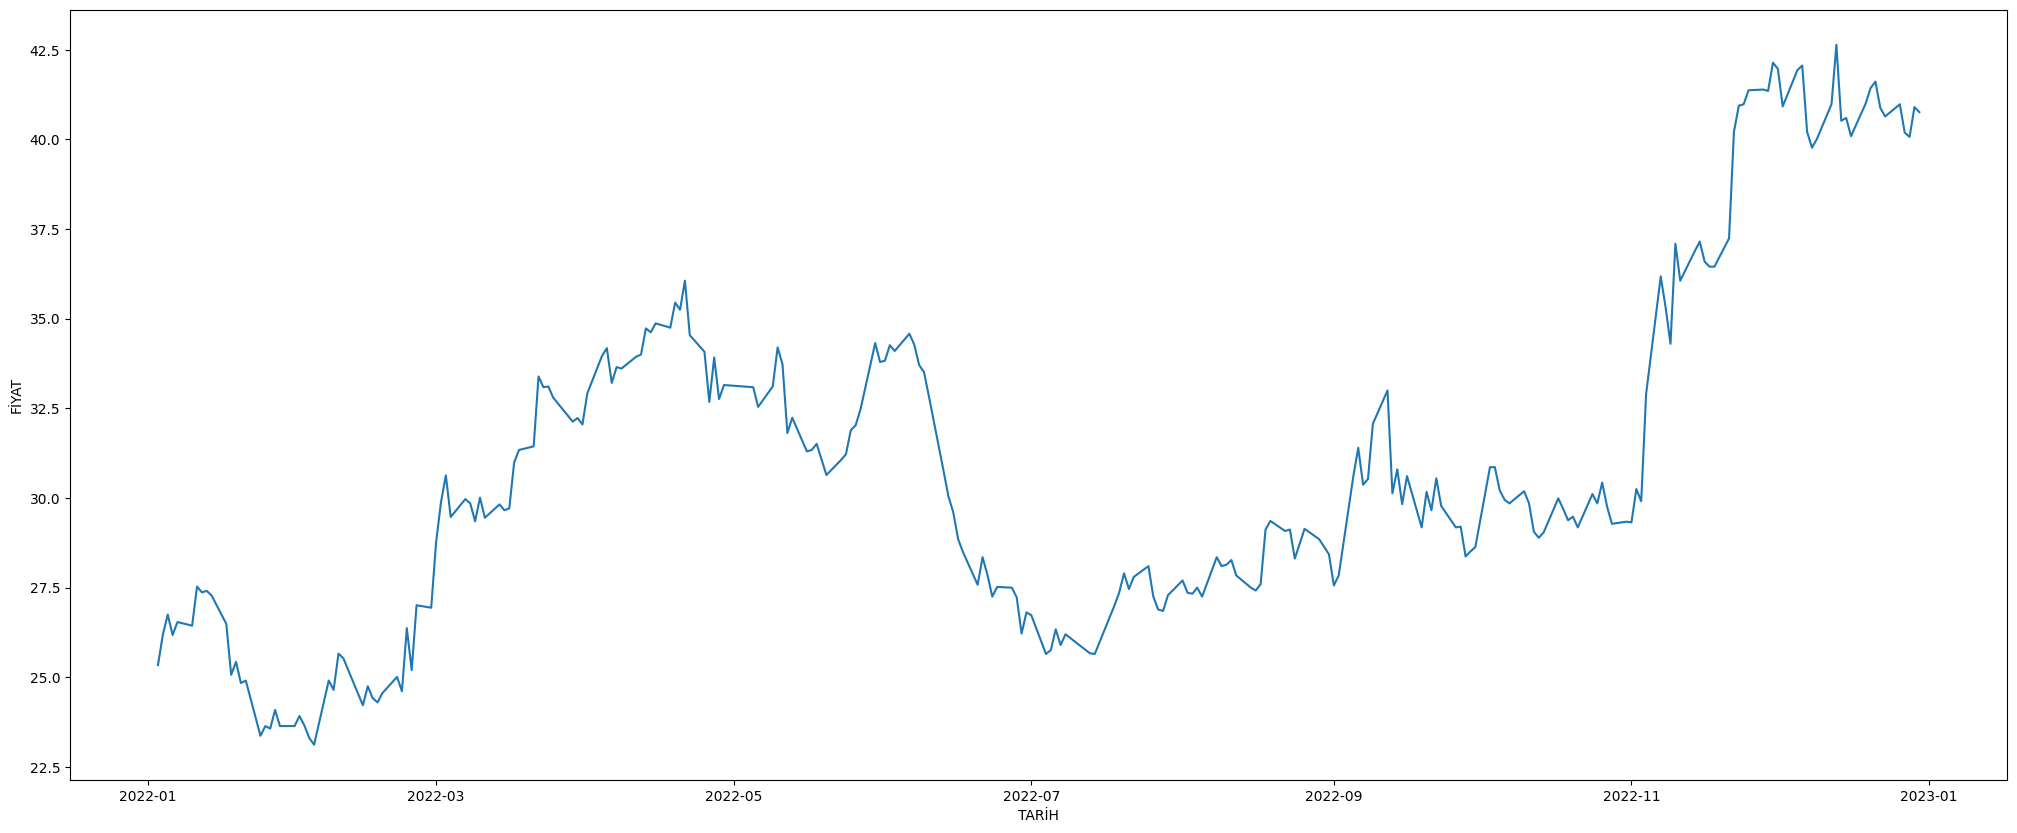

In [456]:
plt.plot(df["Close"])
plt.xlabel('TARİH')
plt.ylabel('FİYAT')


Verileri tarihe göre sıralayıp ratih satırlarına saat bilgilerini gösterecek şekilde düzeltmeler yaptık

In [457]:
df = df.sort_index(ascending=True,axis=0)
data = pd.DataFrame(index=range(0,len(df)),columns=['Date','Close'])
for i in range(0,len(data)):
    data['Date'][i]=df['Date'][i]
    data['Close'][i]=df['Close'][i]
data.head()

,Date,Close
0,2022-01-03 00:00:00,25.34
1,2022-01-04 00:00:00,26.19
2,2022-01-05 00:00:00,26.75
3,2022-01-06 00:00:00,26.18
4,2022-01-07 00:00:00,26.54


Verileri eğitim test verisi olarak ayırdık. Eğitim verisini ilk 192 veri olarak seçtik. Optimizasyon işlemleri için min-max scaleri kullandık. 

In [458]:
scaler=MinMaxScaler(feature_range=(0,1))
data.index=data.Date
data.drop('Date',axis=1,inplace=True)
final_data = data.values
train_data=final_data[0:192,:]
valid_data=final_data[192:,:]
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(final_data)
x_train_data,y_train_data=[],[]
for i in range(60,len(train_data)):
    x_train_data.append(scaled_data[i-60:i,0])
    y_train_data.append(scaled_data[i,0])
x_train_data, y_train_data = np.array(x_train_data), np.array(y_train_data)

x_train_data = np.reshape(x_train_data, (x_train_data.shape[0], x_train_data.shape[1], 1))
x_train_data.shape

(132, 60, 1)

Modeli oluşturup verilerimizi modelimize yükledik.

In [459]:
lstm_model=Sequential()
lstm_model.add(LSTM(units=50,return_sequences=True,input_shape=(np.shape(x_train_data)[1],1)))
lstm_model.add(LSTM(units=50))
lstm_model.add(Dense(1))
model_data=data[len(data)-len(valid_data)-60:].values
model_data=model_data.reshape(-1,1)
model_data=scaler.transform(model_data)

In [460]:
predicted_stock_price=lstm_model.predict(X_test)
predicted_stock_price=scaler.inverse_transform(predicted_stock_price)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 454ms/step


In [461]:
# Boyutları kontrol edelim
print("X_test shape:", X_test.shape)
print("Y_test shape:", Y_test.shape)
print("Prediction shape:", prediction.shape)

# Tahmin işlemi
prediction = lstm_model.predict(X_test)

# Boyutları eşitleyelim
if len(Y_test) != len(prediction):
    min_length = min(len(Y_test), len(prediction))
    Y_test = Y_test[:min_length]
    prediction = prediction[:min_length]

# Hata metriklerini hesaplayalım
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error

MAPE = mean_absolute_percentage_error(Y_test, prediction)
Accuracy = 1 - MAPE
mse = mean_squared_error(Y_test, prediction)
mae = mean_absolute_error(Y_test, prediction)
r2 = r2_score(Y_test, prediction)

print("Accuracy:", Accuracy)
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R^2 Score:", r2)




X_test shape: (51, 3)
Y_test shape: (51,)
Prediction shape: (51,)
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Accuracy: 0.00981813498718398
Mean Squared Error: 0.46860918878617847
Mean Absolute Error: 0.634201442929121
R^2 Score: -5.959003747690608


# KURAL TABANLI SINIFLANDIRMA RAPOR

Öncelikle veri tabanımızı import edelim ve gerekli kütüphaneleri ekleyelim. 

In [462]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv('Erdemir.csv')
df.head()

,Tarih,Kapanış(TL),Min(TL),Max(TL),AOF(TL),Hacim(TL),Sermaye(mn TL),USDTRY,BIST 100,PiyasaDeğeri(mn TL),PiyasaDeğeri(mn USD),HalkaAçık PD(mn TL),HalkaAçık PD(mn USD)
0,03-01-2022,25.34,24.49,25.34,24.90,1351910568,3500,13.4463,1927,102340,7611,48693,3621
1,04-01-2022,26.19,25.45,26.33,25.93,2229221929,3500,13.2110,1964,105770,8006,50325,3809
2,05-01-2022,26.75,25.71,26.87,26.17,2597778492,3500,13.3928,2005,108010,8065,51391,3837
3,06-01-2022,26.18,26.18,26.85,26.53,2740072937,3500,13.6598,2008,105700,7738,50292,3682
4,07-01-2022,26.54,26.23,27.02,26.63,3771672520,3500,13.7774,2033,107170,7779,50991,3701


Ardından Özellik seçimi ile kullanmayacağımız verileri çıkartalım.

In [463]:
df = df.drop(df.columns[[0, 5, 6, 7, 8, 9, 10 , 11, 12]], axis=1)
df.head()

,Kapanış(TL),Min(TL),Max(TL),AOF(TL)
0,25.34,24.49,25.34,24.90
1,26.19,25.45,26.33,25.93
2,26.75,25.71,26.87,26.17
3,26.18,26.18,26.85,26.53
4,26.54,26.23,27.02,26.63


Burada ise tablo isimlendirmelerini kod yazmaya uygun hale getirdik türkçe karakter kullanmadık

In [464]:
df.rename(columns={"Kapanış(TL)": "Close"}, inplace=True)
df.rename(columns={"AOF(TL)": "Open"}, inplace=True)
df.rename(columns={"Min(TL)": "Min"}, inplace=True)
df.rename(columns={"Max(TL)": "Max"}, inplace=True)
df.head()

,Close,Min,Max,Open
0,25.34,24.49,25.34,24.90
1,26.19,25.45,26.33,25.93
2,26.75,25.71,26.87,26.17
3,26.18,26.18,26.85,26.53
4,26.54,26.23,27.02,26.63


Şimdi kural tabanlı basit bir sınıflandırma yapmak için hisse değerlerinin yükselen veya düşen bir trende sahip olduklarını belirtecek aşağıdaki kodu çalıştırdık

In [465]:
durum = []
for index, row in df.iterrows():
    if row['Close'] > row['Open']:
        durum.append("Yükselen Trend")
    else:
        durum.append("Düşen Trend")
df['Durum'] = durum
df.head()

,Close,Min,Max,Open,Durum
0,25.34,24.49,25.34,24.90,Yükselen Trend
1,26.19,25.45,26.33,25.93,Yükselen Trend
2,26.75,25.71,26.87,26.17,Yükselen Trend
3,26.18,26.18,26.85,26.53,Düşen Trend
4,26.54,26.23,27.02,26.63,Düşen Trend


Sınıflandırmayı yaptıkdan sonra verileri kontrol amaçlı aşağıdaki kodu çalıştırdık.

In [466]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   252 non-null    float64
 1   Min     252 non-null    float64
 2   Max     252 non-null    float64
 3   Open    252 non-null    float64
 4   Durum   252 non-null    object 
dtypes: float64(4), object(1)
memory usage: 10.0+ KB
